<a href="https://colab.research.google.com/github/DillonZdrojewski/1-23-2025/blob/main/FinancialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# !pip install pandas-datareader

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [27]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= end_date)
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.721019,72.776598,71.466812,72.716072,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.941343,72.771760,71.783977,72.009132,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.127873,72.621654,70.876083,72.582916,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.592586,72.849216,72.021223,72.241539,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.943759,73.706279,71.943759,73.403648,132079200,0.0,0.0


## Get the Balance Sheet and Income Statements

In [28]:
balance_sheet = apple.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = apple.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Apple:
info = apple.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = apple.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                            2024-09-30      2023-09-30      2022-09-30  \
Treasury Shares Number             NaN             0.0             NaN   
Ordinary Shares Number   15116786000.0   15550061000.0   15943425000.0   
Share Issued             15116786000.0   15550061000.0   15943425000.0   
Net Debt                 76686000000.0   81123000000.0   96423000000.0   
Total Debt              106629000000.0  111088000000.0  132480000000.0   

                            2021-09-30 2020-09-30  
Treasury Shares Number             NaN        NaN  
Ordinary Shares Number   16426786000.0        NaN  
Share Issued             16426786000.0        NaN  
Net Debt                 89779000000.0        NaN  
Total Debt              136522000000.0        NaN  

Income Statement:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   

In [29]:
apple = yf.Ticker("AAPL")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [30]:
print(META.Close.mean())
META.describe()

299.9754141395587


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,299.811909,304.029697,295.797742,299.975414,2.315541e+07,0.001591,0.0
std,124.745252,125.702635,123.419958,124.602584,1.572882e+07,0.028172,0.0
min,89.657445,90.035660,87.676774,88.492935,4.726100e+06,0.000000,0.0
25%,207.860358,210.607403,205.541276,208.795929,1.453120e+07,0.000000,0.0
50%,277.850492,283.892024,274.983974,279.512634,1.938320e+07,0.000000,0.0
75%,345.003967,350.448326,341.570138,344.665588,2.711680e+07,0.000000,0.0
max,630.430133,637.318434,626.147422,631.608093,2.323166e+08,0.500000,0.0


## Now, let us keep only the closing prices for our analysis.

In [31]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,300.291534
2020-01-03 00:00:00-05:00,298.017731
2020-01-06 00:00:00-05:00,299.154663
2020-01-07 00:00:00-05:00,298.313446
2020-01-08 00:00:00-05:00,299.903351
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [32]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'NFLX':NFLX, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2024-12-23 00:00:00-05:00,592.906433,254.989655,17.250000,911.450012,599.316772,85.269997
2024-12-24 00:00:00-05:00,599.496582,257.916443,17.350000,932.119995,607.209778,85.669998
2024-12-26 00:00:00-05:00,599.536499,258.735504,17.350000,924.140015,602.813660,85.440002
2024-12-27 00:00:00-05:00,593.225464,255.309296,17.350000,907.549988,599.276855,83.820000
2024-12-30 00:00:00-05:00,586.455811,251.923019,17.620001,900.429993,590.714417,82.730003


In [33]:
# print(AAPL)
# print(AAPL.shift(1))

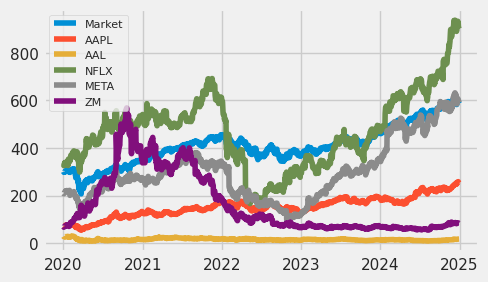

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

## For financial analysis, we require the log returns (daily), rather than the raw stock prices. The formula for log returns is:

log(Today's Price/yesterday's price - 1)

In [35]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,-0.011926,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007936,-0.012007,0.030014,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.015242,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000


## Find the betas of the stocks. The formula is shown below:

In [36]:
beta_aapl = (data[['Market','AAPL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aapl

np.float64(1.1898317959233593)

### Calculate beta using regression line.

In [37]:
beta, alpha = np.polyfit(data['Market'], data['AAPL'], 1)
alpha
beta

np.float64(1.1898317959233582)

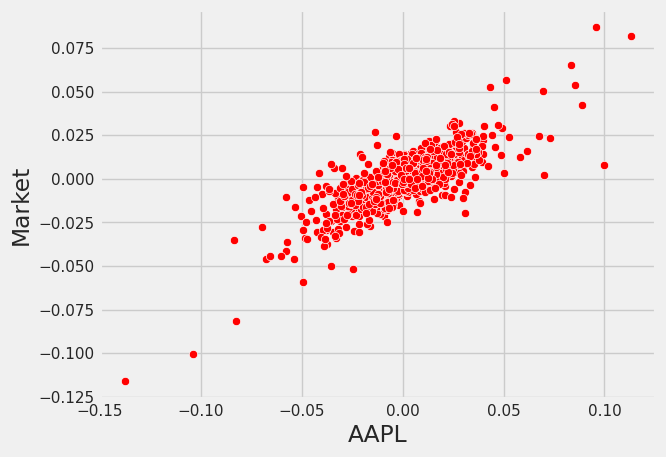

In [38]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'AAPL', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='AAPL'>

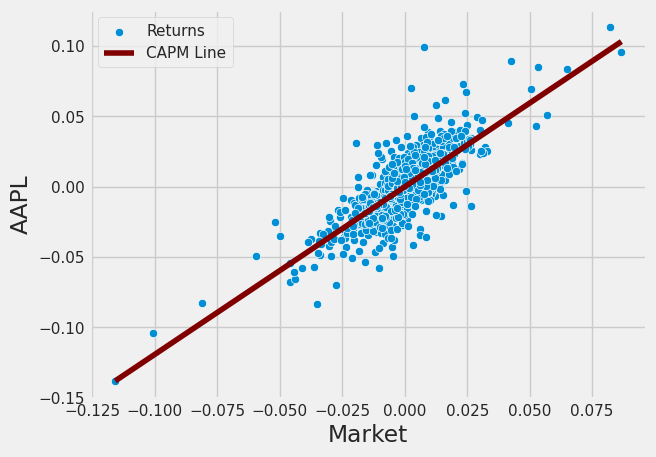

In [39]:
sns.scatterplot(y = 'AAPL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_aapl, color = 'maroon', label = 'CAPM Line')

### Convert Daily Stock Market Returns to Annualized Returns (assuming 252 trading days in a year).

In [40]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAPL']].cov() *252
cov_aapl_market = cov.iloc[0,1]
cov_aapl_market
market_var = data['Market'].var()*252
market_var

AAPL_beta_annual = cov_aapl_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAPL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAPL_capm_return = rf + AAPL_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {AAPL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.1898317959233593
The annualized CAPM return of AAPL is 15.49%


In [41]:
sharperatio = (rm-rf)/(data['AAPL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.345


In [53]:
# prompt: Generate a fama french 3 model

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'data' DataFrame from the previous code is available
# ... (previous code to generate 'data' DataFrame) ...

# Fama-French 3-Factor Model
# We need market risk premium (Mkt-RF), SMB (Small Minus Big), and HML (High Minus Low)
# You'll need to obtain these factors from a financial data provider (e.g., Ken French's website)

# Example (replace with actual data):
factors = pd.DataFrame({
    'Mkt-RF': np.random.normal(0.05, 0.02, len(data)),  # Replace with actual market risk premium
    'SMB': np.random.normal(0.02, 0.01, len(data)),  # Replace with actual SMB
    'HML': np.random.normal(0.03, 0.015, len(data)),  # Replace with actual HML
    'RF': np.repeat(0.025, len(data))  # Replace with actual risk-free rate
}, index=data.index)

# Excess returns of AAPL
excess_returns = data['AAPL'] - factors['RF']

# Independent variables: Market risk premium, SMB, HML
X = factors[['Mkt-RF', 'SMB', 'HML']]

#Add a constant
X = sm.add_constant(X)

# OLS Regression
model = sm.OLS(excess_returns, X)
results = model.fit()

# Print regression results
print(results.summary())

# Access coefficients
alpha = results.params['const']
beta_market = results.params['Mkt-RF']
beta_smb = results.params['SMB']
beta_hml = results.params['HML']

print(f"\nAlpha: {alpha:.4f}")
print(f"Beta (Market): {beta_market:.4f}")
print(f"Beta (SMB): {beta_smb:.4f}")
print(f"Beta (HML): {beta_hml:.4f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7410
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.528
Time:                        22:02:39   Log-Likelihood:                 3139.3
No. Observations:                1257   AIC:                            -6271.
Df Residuals:                    1253   BIC:                            -6250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0223      0.002     -9.864      0.0